In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
files = {
    "City": "City.xlsx",
    "Continent": "Continent.xlsx",
    "Country": "Country.xlsx",
    "Item": "Item.xlsx",
    "Mode": "Mode.xlsx",
    "Region": "Region.xlsx",
    "Transaction": "Transaction.xlsx",
    "Type": "Type.xlsx",
    "User": "User.xlsx",
}

# Read the Excel files
data = {name: pd.read_excel(path) for name, path in files.items()}

# Store transaction data before merging
before_merge = data["Transaction"].head()

# Merge datasets
city = data["City"]
continent = data["Continent"]
country = data["Country"]
item = data["Item"]
mode = data["Mode"]
region = data["Region"]
transaction = data["Transaction"]
type_ = data["Type"]
user = data["User"]

# Join country, region, and continent data
country = country.merge(region, on="RegionId", how="inner")
country = country.merge(continent, on="ContinentId", how="inner")
city = city.merge(country, on="CountryId", how="inner")
user = user.merge(city, on="CityId", how="inner")


# Merge transaction data with users and attractions
transaction = transaction.merge(user, on="UserId", how="inner")
transaction = transaction.merge(mode, left_on="VisitMode", right_on="VisitModeId", how="inner")
transaction = transaction.merge(item, on="AttractionId", how="inner")
transaction = transaction.merge(type_, on="AttractionTypeId", how="inner")

# Store transaction data after merging
after_merge = transaction
# Display before and after merge tables
print("Before Merge:")
display(before_merge)

print("\nAfter Merge:")
display(after_merge)

Before Merge:


,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating
0,3,70456,2022,10,2,640,5
1,8,7567,2022,10,4,640,5
2,9,79069,2022,10,3,640,5
3,10,31019,2022,10,3,640,3
4,15,43611,2022,10,2,640,3



After Merge:


,TransactionId,UserId,VisitYear,VisitMonth,VisitMode_x,AttractionId,Rating,ContinentId_x,RegionId_x,CountryId_x,...,Region,ContinentId_y,Continent,VisitModeId,VisitMode_y,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType
0,3,70456,2022,10,2,640,5,5,21,163,...,Australia,4,Australia & Oceania,2,Couples,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
1,8,7567,2022,10,4,640,5,2,8,48,...,Northern America,2,America,4,Friends,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
2,9,79069,2022,10,3,640,5,2,9,54,...,Northern America,2,America,3,Family,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
3,10,31019,2022,10,3,640,3,5,17,135,...,Northern America,2,America,3,Family,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
4,15,43611,2022,10,2,640,3,5,21,163,...,Northern America,2,America,2,Couples,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52917,211227,87100,2018,9,2,1297,4,5,21,159,...,Western Europe,5,Europe,2,Couples,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites
52918,211238,88112,2016,2,2,1297,5,5,17,133,...,Central Europe,5,Europe,2,Couples,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites
52919,211239,88112,2016,2,2,1297,4,5,17,133,...,Central Europe,5,Europe,2,Couples,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites
52920,211240,88112,2016,2,2,1297,4,5,17,133,...,Central Europe,5,Europe,2,Couples,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites


In [3]:
after_merge['VisitYear']=pd.to_datetime(after_merge['VisitYear'],format='%Y').dt.year
after_merge["VisitMonth"] = pd.to_datetime(after_merge["VisitMonth"], format="%m").dt.month

#Save CSV Before Outlier Correction
after_merge.to_csv("After_Merge.csv",index=False)

## Outlier Detection And Outlier Correction

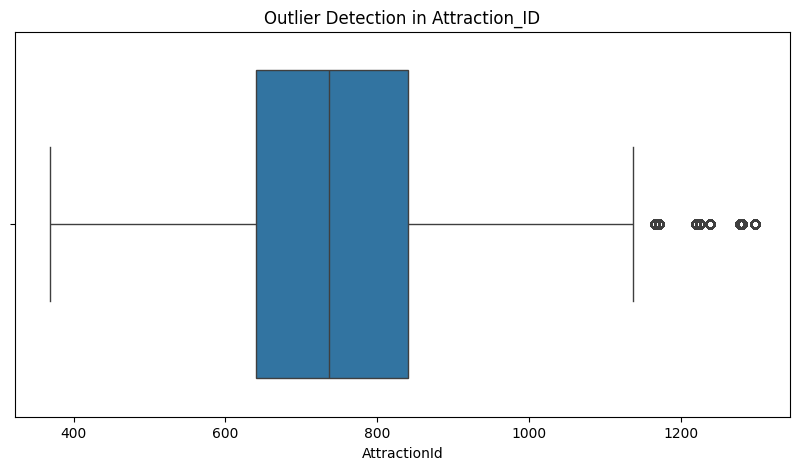

In [4]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=after_merge["AttractionId"])
plt.title("Outlier Detection in Attraction_ID")
plt.show()

## Before outlier Detection

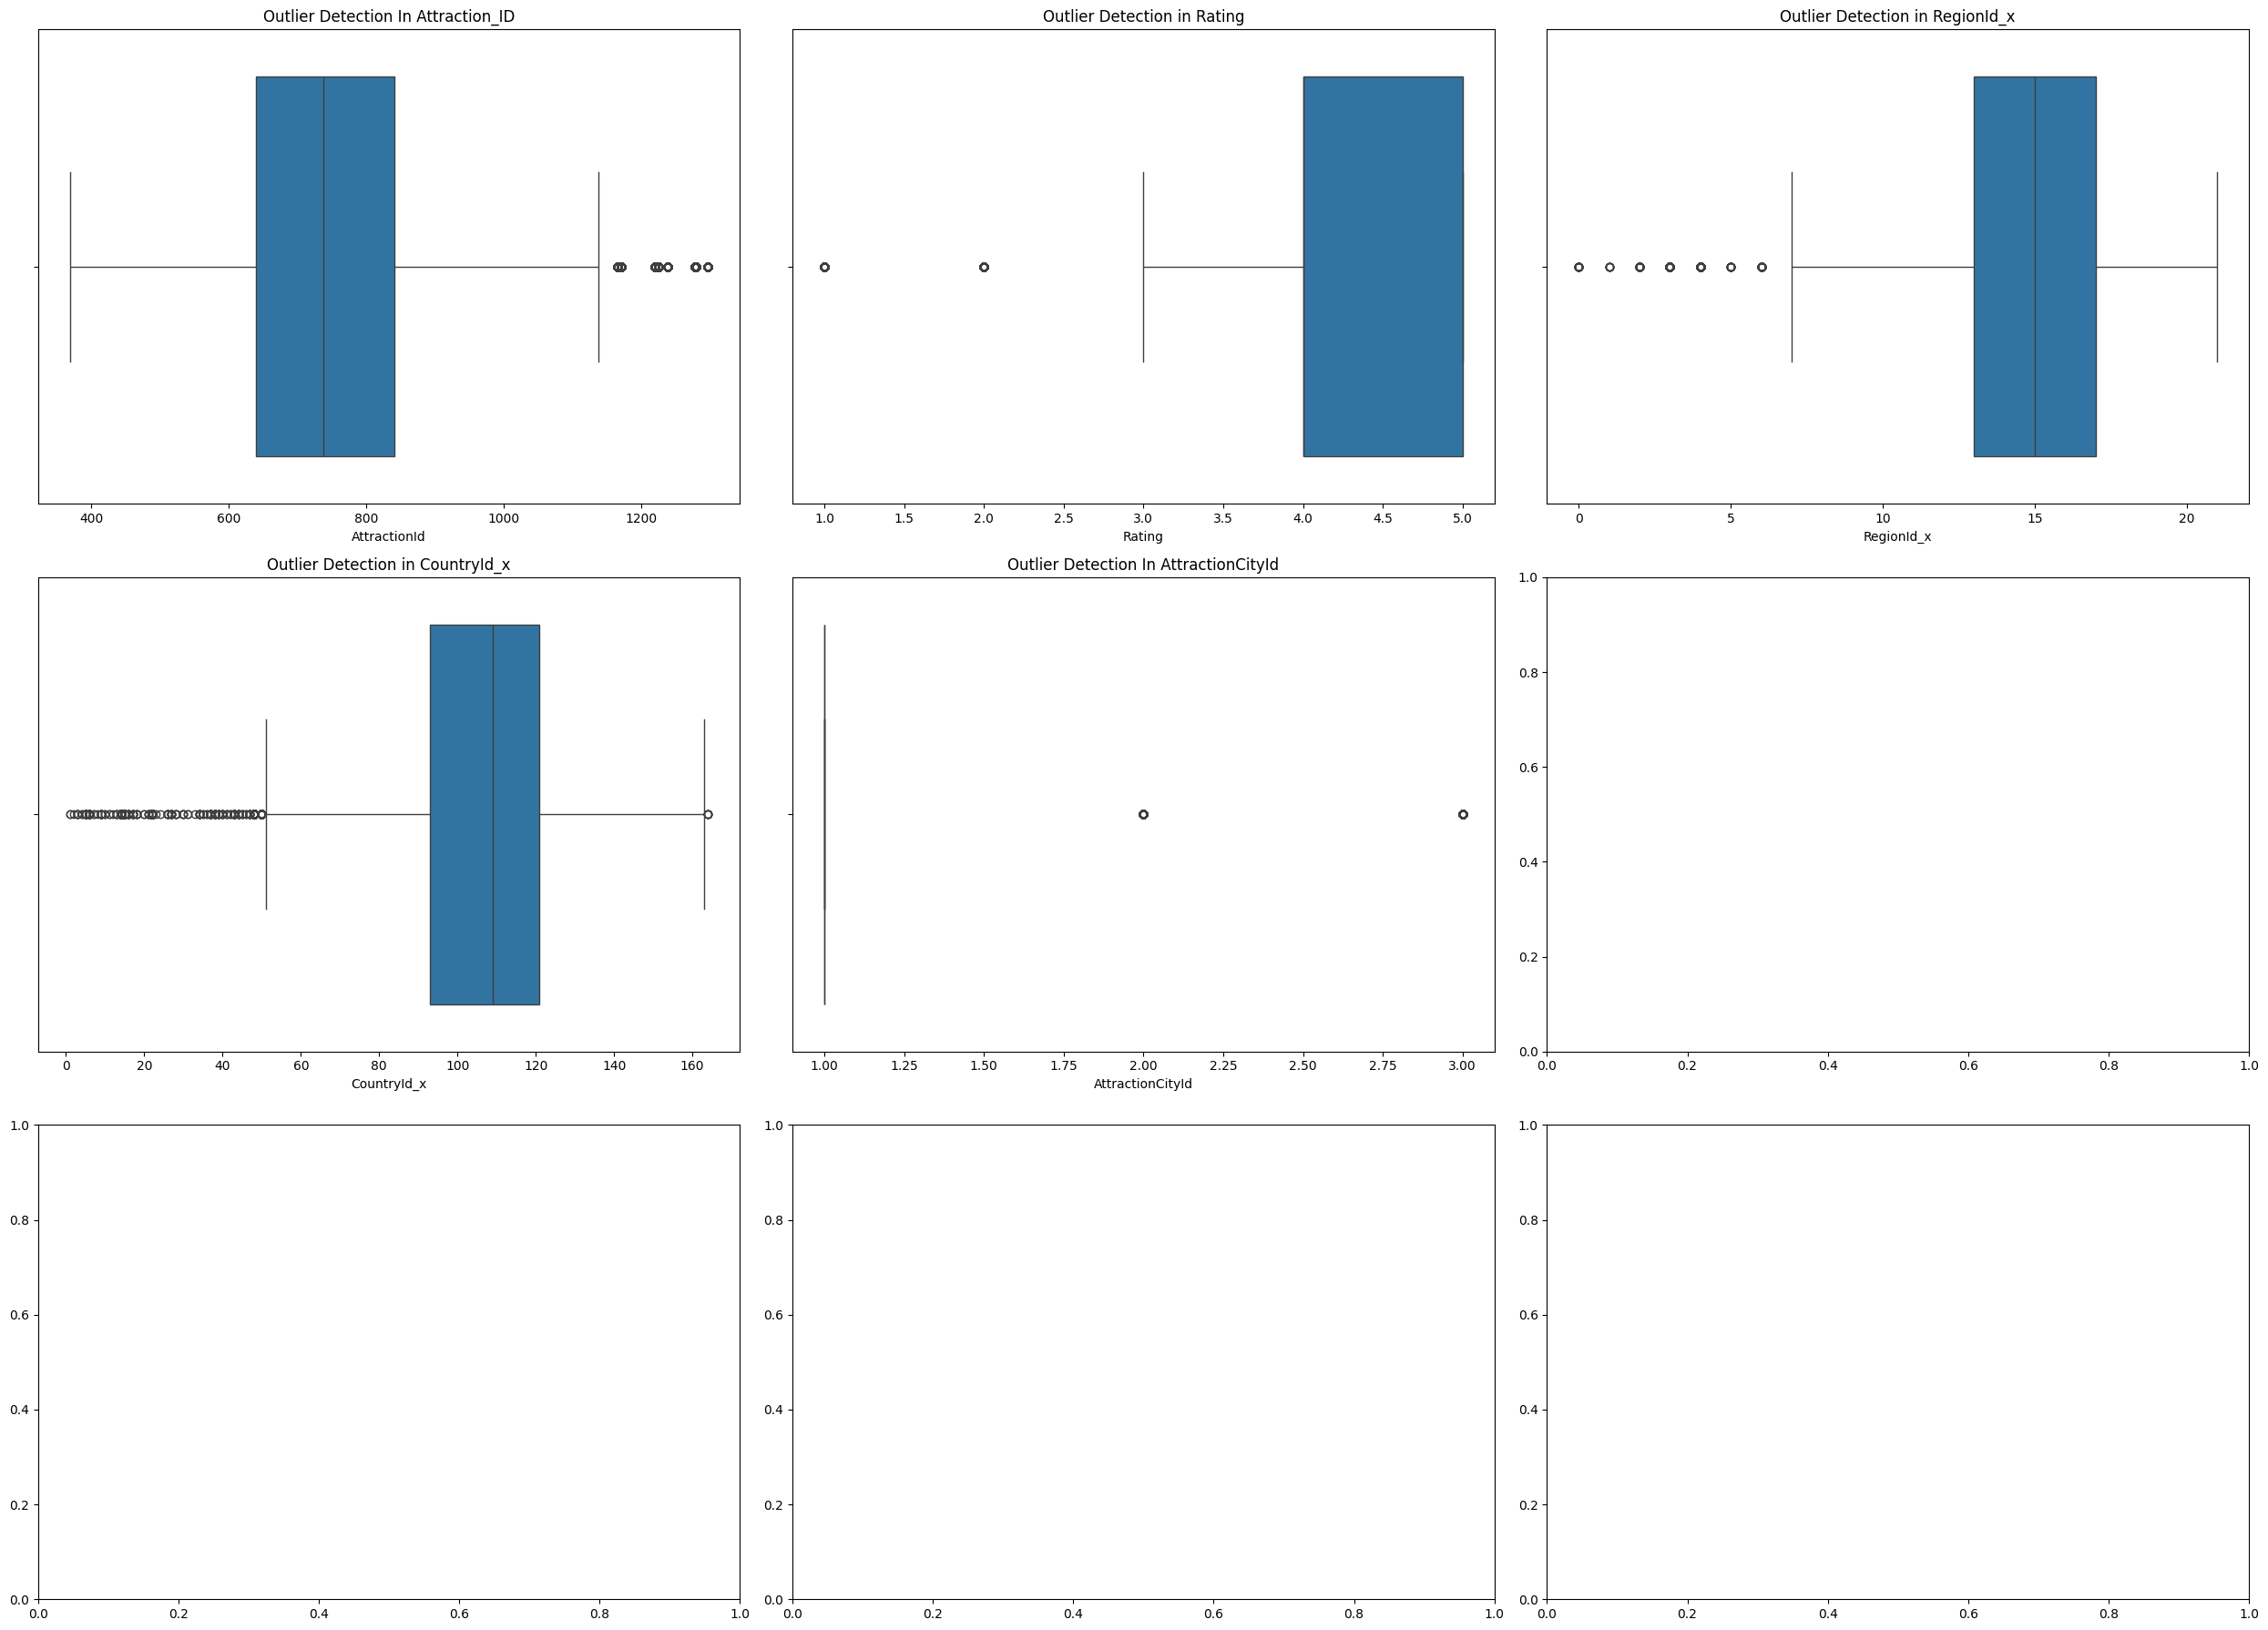

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(25, 18))

# First plot
sns.boxplot(x=after_merge['AttractionId'],ax=axes[0,0])
axes[0,0].set_title("Outlier Detection In Attraction_ID")

# Second plot
sns.boxplot(x=after_merge['Rating'], ax=axes[0, 1])
axes[0,1].set_title("Outlier Detection in Rating")

# Third plot
sns.boxplot(x=after_merge['RegionId_x'], ax=axes[0, 2])
axes[0, 2].set_title("Outlier Detection in RegionId_x")

# Fourth plot
sns.boxplot(x=after_merge['CountryId_x'], ax=axes[1, 0])
axes[1, 0].set_title("Outlier Detection in CountryId_x")

sns.boxplot(x=after_merge['AttractionCityId'],ax=axes[1,1])
axes[1,1].set_title("Outlier Detection In AttractionCityId")
plt.tight_layout()
plt.show()

In [6]:
after_merge.to_csv('Tourism.csv',index=False)
df=pd.read_csv('Tourism.csv')

In [7]:
def Detection_Outliers_iqr(after_merge, columns):
    for column in columns:
        Q1 = after_merge[column].quantile(0.25)
        Q3 = after_merge[column].quantile(0.75)
        IQR = Q3 - Q1
        LB = Q1 - 1.5 * IQR
        UB = Q3 + 1.5 * IQR        
        outliers_count = ((after_merge[column] < LB) | (after_merge[column] > UB)).sum()
        print(f"Outliers detected in {column}: {outliers_count}")
    return after_merge

columns_to_check = ['TransactionId','UserId','VisitMode_x','ContinentId_x','CountryId_y','CityId','RegionId_y','ContinentId_y','VisitModeId','AttractionTypeId','Rating','AttractionId','RegionId_x','CountryId_x','AttractionCityId']
Detections_outliers_iqr = Detection_Outliers_iqr(after_merge.copy(), columns_to_check)


Outliers detected in TransactionId: 0
Outliers detected in UserId: 0
Outliers detected in VisitMode_x: 0
Outliers detected in ContinentId_x: 0
Outliers detected in CountryId_y: 0
Outliers detected in CityId: 0
Outliers detected in RegionId_y: 0
Outliers detected in ContinentId_y: 0
Outliers detected in VisitModeId: 0
Outliers detected in AttractionTypeId: 0
Outliers detected in Rating: 3298
Outliers detected in AttractionId: 6666
Outliers detected in RegionId_x: 1004
Outliers detected in CountryId_x: 2610
Outliers detected in AttractionCityId: 7760


## Feature Engineering

In [8]:
# Aggregate user-level features
user_profile = df.groupby("UserId").agg(
    avg_rating_per_visit_mode=("Rating", "mean"),  # Average rating per user
    total_visits=("VisitMode_x", "count"),  # Total number of visits
    avg_spending=("TransactionId", "mean"),  # Average spending per user
    distinct_attractions=("AttractionId", "nunique"),  # Number of unique attractions visited
    preferred_visit_mode=("VisitMode_y", lambda x: x.mode()[0] if not x.mode().empty else None)  # Most common visit mode
).reset_index()

# Display the aggregated user profile data
user_profile.head()


,UserId,avg_rating_per_visit_mode,total_visits,avg_spending,distinct_attractions,preferred_visit_mode
0,14,4.666667,3,47363.333333,2,Friends
1,16,4.700000,10,27531.000000,5,Family
2,20,4.000000,1,25648.000000,1,Family
3,23,5.000000,1,69140.000000,1,Friends
4,25,5.000000,1,194876.000000,1,Friends


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52922 entries, 0 to 52921
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionId      52922 non-null  int64  
 1   UserId             52922 non-null  int64  
 2   VisitYear          52922 non-null  int64  
 3   VisitMonth         52922 non-null  int64  
 4   VisitMode_x        52922 non-null  int64  
 5   AttractionId       52922 non-null  int64  
 6   Rating             52922 non-null  int64  
 7   ContinentId_x      52922 non-null  int64  
 8   RegionId_x         52922 non-null  int64  
 9   CountryId_x        52922 non-null  int64  
 10  CityId             52922 non-null  float64
 11  CityName           52922 non-null  object 
 12  CountryId_y        52922 non-null  int64  
 13  Country            52922 non-null  object 
 14  RegionId_y         52922 non-null  int64  
 15  Region             52922 non-null  object 
 16  ContinentId_y      529

In [10]:
df.nunique()

TransactionId        52922
UserId               33526
VisitYear               10
VisitMonth              12
VisitMode_x              5
AttractionId            30
Rating                   5
ContinentId_x            5
RegionId_x              22
CountryId_x            153
CityId                5545
CityName              5545
CountryId_y            151
Country                151
RegionId_y              22
Region                  22
ContinentId_y            6
Continent                6
VisitModeId              5
VisitMode_y              5
AttractionCityId         3
AttractionTypeId        17
Attraction              30
AttractionAddress       25
AttractionType          17
dtype: int64